In [1]:
#  Duomenų apdorojimas. Sukurkite modelį, kuris prognozuoja “Gross domestic product per capita”

In [2]:
# TX_RPCH - Volume of exports of goods and services
# NGDPD - GDP
# NGDPDPC - GDP per capita

In [3]:
# Duomenų manipuliacijai
import numpy as np
import pandas as pd

# Vizualizacijai
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Warning suppression
import warnings

warnings.filterwarnings("ignore")

In [4]:
data = pd.read_excel(r"data\WEOOct2022all_copy.xlsx")
df = data.copy()

In [5]:
df.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1319.9,1288.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1469.6,1547.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [6]:
n_columns = [
    1980,
    1981,
    1982,
    1983,
    1984,
    1985,
    1986,
    1987,
    1988,
    1989,
    1990,
    1991,
    1992,
    1993,
    1994,
    1995,
    1996,
    1997,
    1998,
    1999,
    2000,
    2001,
    2002,
    2003,
    2004,
    2005,
    2006,
    2007,
    2008,
    2009,
    2010,
    2011,
    2012,
    2013,
    2014,
    2015,
    2016,
    2017,
    2018,
    2019,
    2021,
    2022,
    2023,
    2024,
    2025,
    2026,
    2027,
]
df.drop(n_columns, inplace=True, axis=1)

In [7]:
df.drop(
    [
        "WEO Country Code",
        "Estimates Start After",
        "Country/Series-specific Notes",
        "Scale",
    ],
    axis=1,
    inplace=True,
)

In [8]:
df.drop(["Subject Descriptor", "Subject Notes", "Units", "ISO"], axis=1, inplace=True)

In [9]:
df = df.dropna().reset_index(drop=True)

In [10]:
df

,WEO Subject Code,Country,2020
0,NGDP_R,Afghanistan,1288.87
1,NGDP_RPCH,Afghanistan,-2.351
2,NGDP,Afghanistan,1547.29
3,NGDPD,Afghanistan,20.136
4,PPPGDP,Afghanistan,80.912
...,...,...,...
7588,GGXWDG,Zimbabwe,1218.76
7589,GGXWDG_NGDP,Zimbabwe,102.491
7590,NGDP_FY,Zimbabwe,1189.14
7591,BCA,Zimbabwe,0.678


In [11]:
df_pivot=df.pivot(index='Country', columns='WEO Subject Code', values=2020)
df_pivot

WEO Subject Code,BCA,BCA_NGDPD,GGR,GGR_NGDP,GGSB,GGSB_NPGDP,GGX,GGXCNL,GGXCNL_NGDP,GGXONLB,...,PCPIEPCH,PCPIPCH,PPPEX,PPPGDP,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.247,11.157,397.564,25.694,NaN,NaN,432.266,-34.703,-2.243,-34.131,...,4.987,5.607,19.123,80.912,2456.29,0.061,-2.844,-2.925,-16.606,0.534
Albania,-1.315,-8.677,425.906,25.905,NaN,NaN,536.28,-110.374,-6.713,-75.98,...,1.051,1.621,40.437,40.658,14128,0.031,-5.103,-19.535,-2.056,-27.549
Algeria,-18.711,-12.911,5640.94,30.684,NaN,NaN,7839.47,-2198.53,-11.959,-2142.61,...,3.516,2.415,36.987,497.03,11334.53,0.374,-18.147,-18.943,-9.322,-4.154
Andorra,0.422,14.634,1.025,40.485,NaN,NaN,1.1,-0.075,-2.96,NaN,...,-0.202,0.257,0.619,4.092,52451.57,0.003,NaN,NaN,NaN,NaN
Angola,0.872,1.5,7052.76,20.983,184.822,0.47,7690.86,-638.098,-1.898,1661.67,...,25.103,22.277,158.416,212.172,6837.35,0.16,-33.399,-33.037,-6.428,-7.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,15.06,4.392,1479360.81,18.571,-235476.4,NaN,1709524,-230163.19,-2.889,-123697.19,...,0.187,3.222,7505.04,1061.44,10877.3,0.798,4.3,2.655,8.461,3.569
West Bank and Gaza,-1.903,-12.25,13.504,25.258,NaN,NaN,17.446,-3.942,-7.373,NaN,...,0.069,-0.711,1.953,27.371,5365.65,0.021,-13.236,-14.171,-7.68,-11.199
Yemen,-1.105,-5.864,929,6.633,NaN,NaN,1599,-670,-4.784,-386,...,35,23.095,233.904,59.877,1979.73,0.045,-23.725,-21.26,0.067,13.182


In [12]:
modified_df=df_pivot.rename_axis(None,axis=1)


In [13]:
modified_df=modified_df.reset_index()
modified_df

,Country,BCA,BCA_NGDPD,GGR,GGR_NGDP,GGSB,GGSB_NPGDP,GGX,GGXCNL,GGXCNL_NGDP,...,PCPIEPCH,PCPIPCH,PPPEX,PPPGDP,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH
0,Afghanistan,2.247,11.157,397.564,25.694,NaN,NaN,432.266,-34.703,-2.243,...,4.987,5.607,19.123,80.912,2456.29,0.061,-2.844,-2.925,-16.606,0.534
1,Albania,-1.315,-8.677,425.906,25.905,NaN,NaN,536.28,-110.374,-6.713,...,1.051,1.621,40.437,40.658,14128,0.031,-5.103,-19.535,-2.056,-27.549
2,Algeria,-18.711,-12.911,5640.94,30.684,NaN,NaN,7839.47,-2198.53,-11.959,...,3.516,2.415,36.987,497.03,11334.53,0.374,-18.147,-18.943,-9.322,-4.154
3,Andorra,0.422,14.634,1.025,40.485,NaN,NaN,1.1,-0.075,-2.96,...,-0.202,0.257,0.619,4.092,52451.57,0.003,NaN,NaN,NaN,NaN
4,Angola,0.872,1.5,7052.76,20.983,184.822,0.47,7690.86,-638.098,-1.898,...,25.103,22.277,158.416,212.172,6837.35,0.16,-33.399,-33.037,-6.428,-7.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,15.06,4.392,1479360.81,18.571,-235476.4,NaN,1709524,-230163.19,-2.889,...,0.187,3.222,7505.04,1061.44,10877.3,0.798,4.3,2.655,8.461,3.569
191,West Bank and Gaza,-1.903,-12.25,13.504,25.258,NaN,NaN,17.446,-3.942,-7.373,...,0.069,-0.711,1.953,27.371,5365.65,0.021,-13.236,-14.171,-7.68,-11.199
192,Yemen,-1.105,-5.864,929,6.633,NaN,NaN,1599,-670,-4.784,...,35,23.095,233.904,59.877,1979.73,0.045,-23.725,-21.26,0.067,13.182
193,Zambia,2.181,12.041,67.437,20.299,NaN,NaN,113.227,-45.789,-13.783,...,19.231,15.733,5.227,63.559,3366.14,0.048,-10.597,-10.597,9.23,9.23


In [14]:
df = modified_df.copy()
df 

,Country,BCA,BCA_NGDPD,GGR,GGR_NGDP,GGSB,GGSB_NPGDP,GGX,GGXCNL,GGXCNL_NGDP,...,PCPIEPCH,PCPIPCH,PPPEX,PPPGDP,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH
0,Afghanistan,2.247,11.157,397.564,25.694,NaN,NaN,432.266,-34.703,-2.243,...,4.987,5.607,19.123,80.912,2456.29,0.061,-2.844,-2.925,-16.606,0.534
1,Albania,-1.315,-8.677,425.906,25.905,NaN,NaN,536.28,-110.374,-6.713,...,1.051,1.621,40.437,40.658,14128,0.031,-5.103,-19.535,-2.056,-27.549
2,Algeria,-18.711,-12.911,5640.94,30.684,NaN,NaN,7839.47,-2198.53,-11.959,...,3.516,2.415,36.987,497.03,11334.53,0.374,-18.147,-18.943,-9.322,-4.154
3,Andorra,0.422,14.634,1.025,40.485,NaN,NaN,1.1,-0.075,-2.96,...,-0.202,0.257,0.619,4.092,52451.57,0.003,NaN,NaN,NaN,NaN
4,Angola,0.872,1.5,7052.76,20.983,184.822,0.47,7690.86,-638.098,-1.898,...,25.103,22.277,158.416,212.172,6837.35,0.16,-33.399,-33.037,-6.428,-7.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,15.06,4.392,1479360.81,18.571,-235476.4,NaN,1709524,-230163.19,-2.889,...,0.187,3.222,7505.04,1061.44,10877.3,0.798,4.3,2.655,8.461,3.569
191,West Bank and Gaza,-1.903,-12.25,13.504,25.258,NaN,NaN,17.446,-3.942,-7.373,...,0.069,-0.711,1.953,27.371,5365.65,0.021,-13.236,-14.171,-7.68,-11.199
192,Yemen,-1.105,-5.864,929,6.633,NaN,NaN,1599,-670,-4.784,...,35,23.095,233.904,59.877,1979.73,0.045,-23.725,-21.26,0.067,13.182
193,Zambia,2.181,12.041,67.437,20.299,NaN,NaN,113.227,-45.789,-13.783,...,19.231,15.733,5.227,63.559,3366.14,0.048,-10.597,-10.597,9.23,9.23


In [15]:
df [df['Country'] == 'Lithuania']

,Country,BCA,BCA_NGDPD,GGR,GGR_NGDP,GGSB,GGSB_NPGDP,GGX,GGXCNL,GGXCNL_NGDP,...,PCPIEPCH,PCPIPCH,PPPEX,PPPGDP,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH
97,Lithuania,4.146,7.338,17.282,34.907,-3.26,-6.587,20.88,-3.598,-7.268,...,-0.072,1.062,0.452,109.599,39214.23,0.082,NaN,-4.38,NaN,0.434


In [16]:
df.isnull().sum()

Country           0
BCA               1
BCA_NGDPD         1
GGR               0
GGR_NGDP          0
GGSB            109
GGSB_NPGDP      113
GGX               0
GGXCNL            0
GGXCNL_NGDP       0
GGXONLB           8
GGXONLB_NGDP      8
GGXWDG            3
GGXWDG_NGDP       3
GGXWDN          106
GGXWDN_NGDP     106
GGX_NGDP          0
LE              156
LP                0
LUR              86
NGAP_NPGDP      168
NGDP              0
NGDPD             0
NGDPDPC           0
NGDPPC            0
NGDPRPC           0
NGDPRPPPPC        0
NGDP_D            0
NGDP_FY           0
NGDP_R            0
NGDP_RPCH         0
NGSD_NGDP        25
NID_NGDP         23
PCPI              0
PCPIE             0
PCPIEPCH          0
PCPIPCH           0
PPPEX             0
PPPGDP            0
PPPPC             0
PPPSH             0
TMG_RPCH         18
TM_RPCH          18
TXG_RPCH         18
TX_RPCH          17
dtype: int64

In [17]:
df.drop(["GGSB", "GGSB_NPGDP", "GGXWDN", "GGXWDN_NGDP"], axis=1, inplace=True)
df.drop(["NGAP_NPGDP", "NGAP_NPGDP", "NGSD_NGDP", "NID_NGDP"], axis=1, inplace=True)
df.drop(["NGDP_R", "PCPIE", "GGR", "GGX", "LE", "LUR"], axis=1, inplace=True)
df.drop(
    ["GGXONLB", "GGXWDG", "PPPEX", "GGXCNL", "PCPIEPCH", "TMG_RPCH", "TXG_RPCH", "NGDPPC"],
    axis=1,
    inplace=True,
)

In [18]:
#df = df.dropna().reset_index(drop=True)

In [19]:
# df.fillna(0)

[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 12.453125, 'Columns'),
 Text(30.5, 0.5, 'Data Points')]

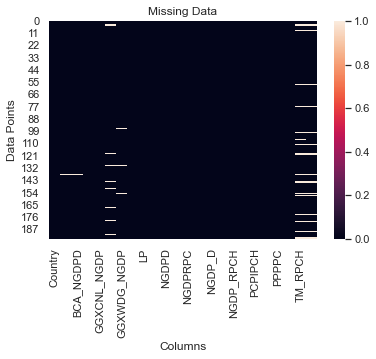

In [20]:
sns.heatmap(df.isnull()).set(
    title="Missing Data", xlabel="Columns", ylabel="Data Points"
)

In [21]:
df=df.fillna(0)

In [22]:
df

,Country,BCA,BCA_NGDPD,GGR_NGDP,GGXCNL_NGDP,GGXONLB_NGDP,GGXWDG_NGDP,GGX_NGDP,LP,NGDP,...,NGDP_D,NGDP_FY,NGDP_RPCH,PCPI,PCPIPCH,PPPGDP,PPPPC,PPPSH,TM_RPCH,TX_RPCH
0,Afghanistan,2.247,11.157,25.694,-2.243,-2.206,7.397,27.937,32.941,1547.290,...,120.050,1547.290,-2.351,120.671,5.607,80.912,2456.29,0.061,-2.925,0.534
1,Albania,-1.315,-8.677,25.905,-6.713,-4.621,75.927,32.619,2.878,1644.080,...,203.320,1644.080,-3.482,108.613,1.621,40.658,14128.00,0.031,-19.535,-27.549
2,Algeria,-18.711,-12.911,30.684,-11.959,-11.655,52.273,42.643,43.851,18383.800,...,256.869,18383.800,-5.100,211.180,2.415,497.030,11334.53,0.374,-18.943,-4.154
3,Andorra,0.422,14.634,40.485,-2.960,0.000,46.329,43.445,0.078,2.531,...,106.557,2.531,-11.184,102.298,0.257,4.092,52451.57,0.003,0.000,0.000
4,Angola,0.872,1.500,20.983,-1.898,4.944,136.540,22.882,31.031,33611.360,...,2293.820,33611.360,-5.750,431.227,22.277,212.172,6837.35,0.16,-33.037,-7.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,15.060,4.392,18.571,-2.889,-1.553,41.668,21.460,97.583,7966121.550,...,159.726,7966121.550,2.944,282.118,3.222,1061.440,10877.30,0.798,2.655,3.569
191,West Bank and Gaza,-1.903,-12.250,25.258,-7.373,0.000,47.080,32.631,5.101,53.466,...,97.994,53.466,-11.318,100.833,-0.711,27.371,5365.65,0.021,-14.171,-11.199
192,Yemen,-1.105,-5.864,6.633,-4.784,-2.756,83.956,11.417,30.245,14005.570,...,6632.850,14005.570,-8.500,1510.560,23.095,59.877,1979.73,0.045,-21.260,13.182
193,Zambia,2.181,12.041,20.299,-13.783,-7.834,140.211,34.081,18.882,332.223,...,241.170,332.223,-2.785,265.798,15.733,63.559,3366.14,0.048,-10.597,9.230


<AxesSubplot:>

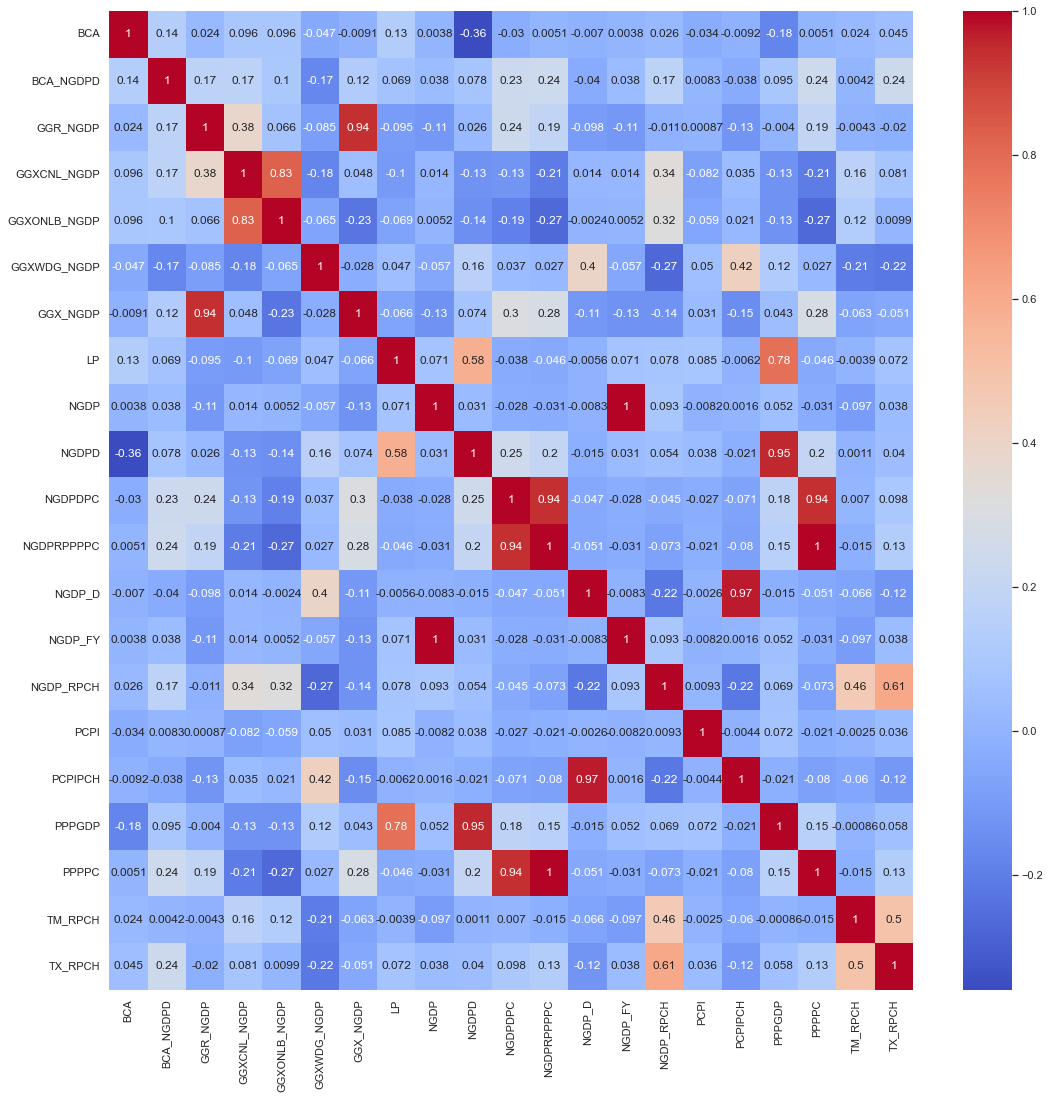

In [23]:
fig, ax = plt.subplots(figsize=(18,18))

sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm')  #cmap='BrBG'

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       195 non-null    object 
 1   BCA           195 non-null    float64
 2   BCA_NGDPD     195 non-null    float64
 3   GGR_NGDP      195 non-null    float64
 4   GGXCNL_NGDP   195 non-null    float64
 5   GGXONLB_NGDP  195 non-null    float64
 6   GGXWDG_NGDP   195 non-null    float64
 7   GGX_NGDP      195 non-null    float64
 8   LP            195 non-null    float64
 9   NGDP          195 non-null    float64
 10  NGDPD         195 non-null    float64
 11  NGDPDPC       195 non-null    float64
 12  NGDPRPC       195 non-null    object 
 13  NGDPRPPPPC    195 non-null    float64
 14  NGDP_D        195 non-null    float64
 15  NGDP_FY       195 non-null    float64
 16  NGDP_RPCH     195 non-null    float64
 17  PCPI          195 non-null    float64
 18  PCPIPCH       195 non-null    

In [25]:
df.to_csv('new_data.csv', index=False)